<a href="https://colab.research.google.com/github/SLVmain/Neural_Network_start/blob/Les_02/HW_02_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [ ]:
import numpy as np
import pandas as pd

import keras
from keras.datasets import mnist, fashion_mnist

(train_imagef,train_labels),(test_imagef,test_labels)=fashion_mnist.load_data()


In [ ]:
# Normalize the images приведем изображение к диапазону (-1,1)
train_imagef_norm = (train_imagef / 127) - 1
test_imagef_norm = (test_imagef / 127) - 1

In [ ]:
# Flatten the images делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор
train_images = train_imagef_norm.reshape((-1, 784))
test_images = test_imagef_norm.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [ ]:
keras.backend.backend()

'tensorflow'

In [ ]:
import matplotlib.pyplot as plt

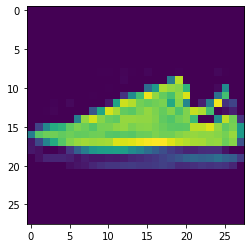

In [ ]:
plt.imshow(train_imagef[6,:,:])
plt.show()

In [ ]:
train_labels[:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [ ]:
train_images[202,150:160]

array([-0.5984252 , -0.62204724, -0.64566929, -0.56692913, -0.59055118,
       -0.62992126, -0.61417323, -0.61417323, -0.66929134, -0.58267717])

**Создание модели**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
model1 = Sequential(name='my_model')
model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
for k in range(2):
  model1.add(Dense(  10+(10-k)*10, activation='tanh')) 

model1.add(Dense(10, activation='softmax')) 

In [ ]:
#loss виды для мультифакторной класс.
#keras.losses.SparseCategoricalCrossentropy().
#keras.losses.categorical_crossentropy()
#keras.metrics.accuracy

In [ ]:
model1.compile(
  optimizer='adam', 
  loss=keras.losses.CategoricalCrossentropy(), 
  metrics=['accuracy'], 
) 

In [ ]:
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer'

Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [ ]:
train_labels[:7]

array([9, 0, 0, 3, 0, 2, 7], dtype=uint8)

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_train[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
# Train the model.
model1.fit(train_images, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4990 - accuracy: 0.8214 - val_loss: 0.3982 - val_accuracy: 0.8578
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8619 - val_loss: 0.3892 - val_accuracy: 0.8643
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3464 - accuracy: 0.8735 - val_loss: 0.3709 - val_accuracy: 0.8661
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3238 - accuracy: 0.8813 - val_loss: 0.3560 - val_accuracy: 0.8727
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3077 - accuracy: 0.8868 - val_loss: 0.3457 - val_accuracy: 0.8745
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2926 - accuracy: 0.8919 - val_loss: 0.3369 - val_accuracy: 0.8780
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2763 - accuracy: 0.8970 - val_loss: 0.3367 - val_accuracy:

In [ ]:
# Evaluate the model.
model1.evaluate(test_images, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3476 - accuracy: 0.8852


[0.3475631773471832, 0.885200023651123]

In [ ]:
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[9 2 1 1 6]
[9 2 1 1 6]


И можем еще один добавить (продолжаем от предществующего состояния)

In [ ]:
model1.fit(
  train_images,
  y_train,
  epochs=3,
  batch_size=1024, validation_split=0.2
)

Epoch 1/3
47/47 [==============================] - 1s 23ms/step - loss: 0.1701 - accuracy: 0.9375 - val_loss: 0.3106 - val_accuracy: 0.8944
Epoch 2/3
47/47 [==============================] - 1s 22ms/step - loss: 0.1503 - accuracy: 0.9459 - val_loss: 0.3095 - val_accuracy: 0.8968
Epoch 3/3
47/47 [==============================] - 1s 22ms/step - loss: 0.1442 - accuracy: 0.9481 - val_loss: 0.3095 - val_accuracy: 0.8954


Сохраним веса модели на диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# сохранить веса модели
path = '/content/drive/MyDrive/Colab_Notebooks/GB_N_Networks/02/'
model1.save_weights(path + 'model.h5')

# загрузить веса модели:
# model.load_weights(path + 'model.h5')


In [ ]:
# задание 1 - Опишите - какой результата получен в нейросети в зависимости от:

#числа нейронов в слое(для 2-хслойной сети),
#числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
#фиксируйте для тренировочного и тестового набора метрики accuracy.

metrics = []

N = [10, 100, 5000, 50000] # Кол-во нейронов в скрытом слое
for i in N:
    model = Sequential() 
    model.add(Dense(i, input_shape=(784,), activation='relu'))
    model.add(Dense(10, activation='softmax')) 


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

    history = model.fit(train_images, y_train, batch_size=128, epochs=10, verbose=0,) # validation_split=0.2)

    metrics = metrics + [[i, 'relu', history.history['accuracy'][-1], round(model.evaluate(test_images, y_test, verbose = 0)[1], 3)]]

  
df = pd.DataFrame(metrics, columns = ['neurons', 'activation', 'train_accuracy','val_accuracy'])
df

,neurons,activation,train_accuracy,val_accuracy
0,10,relu,0.861417,0.844
1,100,relu,0.905933,0.875
2,5000,relu,0.918967,0.876
3,50000,relu,0.921517,0.880


Вывод: с увеличением количества нейронов с 10 до 50 000 accuracy увеличивается и на трейне и на тесте

In [ ]:
#числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров)

metrics = []

N = [2, 3, 5, 10, 100] # Кол-во слоев
for i in N:
    model = Sequential() 
    model.add(Dense(100, input_shape=(784,), activation='relu'))
    
    for k in range(i):
      model1.add(Dense(50, activation='tanh')) 
    
    
    model.add(Dense(10, activation='softmax')) 


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

    history = model.fit(train_images, y_train, batch_size=128, epochs=10, verbose=0,) # validation_split=0.2)

    metrics = metrics + [[i, 'relu', history.history['accuracy'][-1], round(model.evaluate(test_images, y_test, verbose = 0)[1], 3)]]

  
df = pd.DataFrame(metrics, columns = ['num_layers', 'activation', 'train_accuracy','val_accuracy'])
df

,num_layers,activation,train_accuracy,val_accuracy
0,2,relu,0.907050,0.879
1,3,relu,0.907017,0.879
2,5,relu,0.906800,0.878
3,10,relu,0.905433,0.875
4,100,relu,0.907850,0.874


при увеличении скрытых слоев c 2 до 3 точность примерно одинаковая, потом на 5, 10 и 100 точность уменьшается, то есть добавление слоев не влияет на точность

In [ ]:
# Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

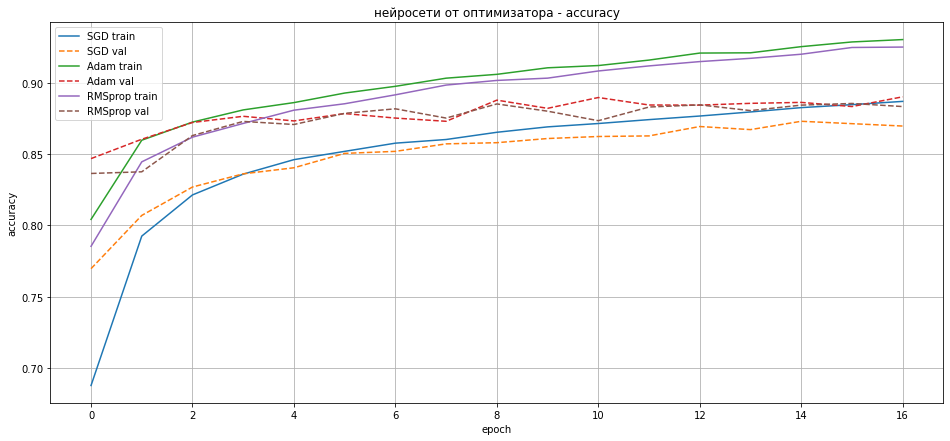

In [ ]:
# создаем модель model
model = Sequential([
                      Dense(100, activation='relu', input_shape=(784,)),
                      Dense(100, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model3.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 17
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( ), keras.optimizers.RMSProp( )]
for i_optim in ['SGD','adam', 'RMSProp',]:
  # создаем рабочую модель modeli куда будем загружать эти веса (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(100, activation='relu', input_shape=(784,)),
                      Dense(100, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model3.h5')
  
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=128, validation_split=0.2, verbose = 0
                  )
  
  plt.plot(hh.history['accuracy'],'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(hh.history['val_accuracy'],'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора - accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


при количестве эпох более 12 точность на тесте при ADAM и RMSprop начинает сближаться (SGD хуже остальных), но после 12-14 эпох начинается переобучение

In [ ]:
 # Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [ ]:
model_final = Sequential([
                      Dense(100, activation='tanh', input_shape=(784,)),
                      Dense(800, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  
model_final.compile(
      optimizer= 'adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
hh = model_final.fit(train_images,
                  to_categorical(train_labels),
                  epochs=13,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  


y_pred = np.argmax(model_final.predict(test_images), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
CM = confusion_matrix(test_labels,y_pred)
print(CM)

[[837   8  17  23   9   3  91   0  12   0]
 [  1 970   0  19   3   0   4   0   3   0]
 [  9   6 696  11 144   1 127   0   6   0]
 [ 29  38  11 852  48   1  17   0   4   0]
 [  0   3  60  30 847   0  57   0   3   0]
 [  0   0   0   0   0 920   0  50   5  25]
 [154   6  62  29  96   0 637   0  16   0]
 [  0   0   0   0   0  11   0 975   0  14]
 [  3   0   4   2   5   3   4   7 972   0]
 [  0   0   0   1   0   8   0  86   2 903]]


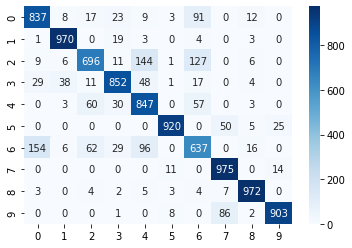

In [ ]:
import seaborn as sns
sns.heatmap(CM.astype(int), annot=True, cmap='Blues', fmt='')

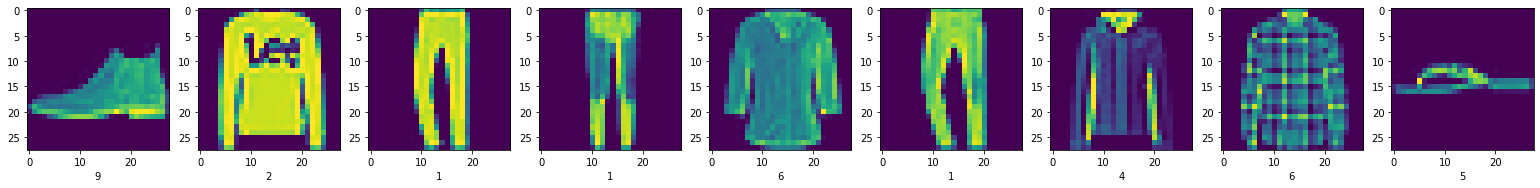

In [ ]:
N = 9
#y_pred = model1.predict(test_images[:N,:])
#y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred[i]))
plt.show()  

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
len(np.where(test_labels != y_pred)[0])

1391

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(test_labels, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.81      0.84      0.82      1000
     class 1       0.94      0.97      0.96      1000
     class 2       0.82      0.70      0.75      1000
     class 3       0.88      0.85      0.87      1000
     class 4       0.74      0.85      0.79      1000
     class 5       0.97      0.92      0.95      1000
     class 6       0.68      0.64      0.66      1000
     class 7       0.87      0.97      0.92      1000
     class 8       0.95      0.97      0.96      1000
     class 9       0.96      0.90      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



2, 4, 6 классы похуже метрики показывают, самый "плохой" - 6 класс